# Natural Language Processing Fundamentals (Days 1-2)

**Goal:** Participants leave with "lexical" NLP skills to go from raw text data to insights to enable effective decision making.

_Lexical Analysis: the meaning of a word in isolation from the sentence containing it._ 

_Semantic Analysis: determining what a sentence or phrase really means based on contextual clues._  

**Day 1\-2 Objectives:**

1. Understand common analytical tasks associated with NLP
2. Understand how text extraction can be completed
3. Understand and conduct common pre\-processing NLP tasks \(tokenization, spelling correction, stop word removal, stemming, lemmatization, casing, removal of digits / punctuation, etc.\)
4. Understand and complete common lexical NLP analytical tasks  
    - <span style='font-size:small'>Part of Speech Tagging</span>
    - <span style='font-size:small'>N\-gram formation</span>
    - <span style='font-size:small'>Sentiment Analysis \(Bag of Words, lexicons \(Vader, Bing, NRC, AFINN, Loughran\)\)</span>
    - <span style='font-size:small'>Basic \(very\) summarization of text</span>
    - <span style='font-size:small'>Basic \(very\) translation</span>
    - <span style='font-size:small'>Basic \(very\) classification</span>  
5. Perform visualizations of text data.




# The task at hand...

Suppose for a moment, that the Math Department Head just received more than 1,500 student responses to a end of course survey. She is interested in what students perceive as HELPFUL and UNHELPFUL experiences. 

What kind of questions might she have?  



In [2]:
import nltk
import numpy
import string
import re
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #Valence Aware Dictionary for sEntiment Reasoning
from nltk.tokenize import word_tokenize

# import warnings
# warnings.filterwarnings("ignore")

### Text Extraction

In our case, we are fortunate to have a beautiful <span style='font-family:Courier'>.csv</span> file that we will use, but in some cases, you may have unstructured text that comes in the form of files \(.pdf, .doc, .txt, .pptx, .jpg, etc.\) or even webpages.  In these cases, there is an added task required to either: 

1. Digitize these documents \(PyPDF2, docx, pptx, pyTesseract\)
2. Scrape these webpages \(get an API, BeautifulSoup, Selenium\)   

**Load D/Math's Course End Feedback**  
_(shortened to ~200 "helpful classroom expereiences" and deidentified for public distribution)_


In [4]:
df = pd.read_csv('../data/CourseEndFeedback_200.csv')
df.head()

,Mathematical Sciences Question Set Question #298: Describe a particularly HELPFUL classroom experience that you had this semester in this math course.
0,!!!12354 In class examples were great for ...
1,I particularly thought getting up to the board...
2,every time we would go to boards we were encou...
3,humor that motivated learning
4,"During almost every class period, we got to go..."


### **Tokenization**

Here we show tokenization with two different packages: 

1. NLTK \(Natural Language Tool Kit\)
2. TextBlob \(Built on NLTK\)  



In [9]:
helpful = df.iloc[:,0]
helpful.rename("text",inplace = True)

0          !!!12354 In class examples were great for ...
1      I particularly thought getting up to the board...
2      every time we would go to boards we were encou...
3                          humor that motivated learning
4      During almost every class period, we got to go...
                             ...                        
220    When the LTC was in the classroom we had a gre...
221    The note sheets for graded assignments were ve...
222    Working through board problems helped me to un...
223    Using your tablet to write all the notes and g...
224           Very open to answering difficult questions
Name: text, Length: 225, dtype: object

In [10]:
tokens = helpful.apply(lambda x: nltk.word_tokenize(str(x))) ### Using NLTK
print("NLTK Tokenization: \n",tokens.head())
tokens = helpful.apply(lambda x: TextBlob(str(x)).words) ### Using TextBlob
print("TextBlob Tokenization: \n",tokens.head())

NLTK Tokenization: 
 0    [!, !, !, 12354, In, class, examples, were, gr...
1    [I, particularly, thought, getting, up, to, th...
2    [every, time, we, would, go, to, boards, we, w...
3                   [humor, that, motivated, learning]
4    [During, almost, every, class, period, ,, we, ...
Name: text, dtype: object
TextBlob Tokenization: 
 0    [12354, In, class, examples, were, great, for,...
1    [I, particularly, thought, getting, up, to, th...
2    [every, time, we, would, go, to, boards, we, w...
3                   [humor, that, motivated, learning]
4    [During, almost, every, class, period, we, got...
Name: text, dtype: object


### **Preprocess HELPFUL classroom experiences**

<span style='font-size:medium'>Most of these tasks are made faster by applying a lambda function to the dataframe by row.</span>



### **Part of Speech Tagging**



<img src="pos_tags.png" style="max-width:100%" />

[Alphabetical list of part-of-speech tags used in the Penn Treebank Project](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

[https://textblob.readthedocs.io/en/dev/advanced_usage.html\#pos\-taggers](https://textblob.readthedocs.io/en/dev/advanced_usage.html#pos-taggers)



In [11]:
text1 = "I think that Major Doe and Doctor Smith are the bomb! They clearly explain everything, but WebAssign is terrible. The project was also terrible. Working at the boards was incredible"
blob = TextBlob(text1)
print(blob.tags)
# Capture tokens and tags
tags = pd.DataFrame(blob.tags, columns = ['token','tag'])
print(tags.head())

[('I', 'PRP'), ('think', 'VBP'), ('that', 'IN'), ('Major', 'NNP'), ('Doe', 'NNP'), ('and', 'CC'), ('Doctor', 'NNP'), ('Smith', 'NNP'), ('are', 'VBP'), ('the', 'DT'), ('bomb', 'NN'), ('They', 'PRP'), ('clearly', 'RB'), ('explain', 'VBP'), ('everything', 'NN'), ('but', 'CC'), ('WebAssign', 'NNP'), ('is', 'VBZ'), ('terrible', 'JJ'), ('The', 'DT'), ('project', 'NN'), ('was', 'VBD'), ('also', 'RB'), ('terrible', 'JJ'), ('Working', 'VBG'), ('at', 'IN'), ('the', 'DT'), ('boards', 'NNS'), ('was', 'VBD'), ('incredible', 'JJ')]
   token  tag
0      I  PRP
1  think  VBP
2   that   IN
3  Major  NNP
4    Doe  NNP


### Removal of Proper Nouns



In [12]:
text1edt = [word for word,tag in blob.tags if tag != ('NNP' or 'NNPS')]
print(text1edt)
print(' '.join(text1edt))

['I', 'think', 'that', 'and', 'are', 'the', 'bomb', 'They', 'clearly', 'explain', 'everything', 'but', 'is', 'terrible', 'The', 'project', 'was', 'also', 'terrible', 'Working', 'at', 'the', 'boards', 'was', 'incredible']
I think that and are the bomb They clearly explain everything but is terrible The project was also terrible Working at the boards was incredible


### Replacement of Proper Nouns



In [13]:
proper= tags['tag'] == ("NNP" or "NNPS")
repl = tags.loc[proper,'token']
print(repl)

for word in repl:
    text1 = text1.replace(word,'xxx')
print(text1)

3         Major
4           Doe
6        Doctor
7         Smith
16    WebAssign
Name: token, dtype: object
I think that xxx xxx and xxx xxx are the bomb! They clearly explain everything, but xxx is terrible. The project was also terrible. Working at the boards was incredible


### For our course end feedback



In [14]:
def removeNoun(text):
    blob = TextBlob(text)
    tags = pd.DataFrame(blob.tags, columns = ['token','tag'])
    proper= tags['tag']== ("NNP" or "NNPS")
    repl = tags.loc[proper,'token']
    for word in repl:
        text = text.replace(word,'xxx')
    return text

helpfulNew = helpful.apply(lambda x: removeNoun(str(x)))



print(removeNoun("In class examples were great for MAJ G and CPT Beavis to use for quizes to see what material was essential to know for Exams."))


In class examples were great for xxx xxx and xxx xxx to use for quizes to see what material was essential to know for xxx.


In [15]:
pd.set_option('display.max_colwidth', 1000)
print(helpful.head())
print(helpfulNew.head())

0                                                                                                                                     !!!12354 In class examples were great for MAJ D and CPT S to use for quizes to see what material was essential to know for WPRs.    
1    I particularly thought getting up to the boards as soon as MAJ S had a good feeling about our understanding of a concept was helpful. I think MAJ S did a pretty good job at balancing getting us to think to understand concepts and teach it to help us understand.
2                                                                                                                                  every time we would go to boards we were encouraged to not work individualy but instead as a group which helped durring dla's and wpr's
3                                                                                                                                                                                                      

### **Lower case the corpus**

Why?



In [16]:
helpfulNew = helpfulNew.apply(lambda x: str(x).lower())
helpfulNew.head()

0                                                                                                                                      !!!12354 in class examples were great for xxx xxx and xxx xxx to use for quizes to see what material was essential to know for xxx.    
1    i particularly thought getting up to the boards as soon as xxx xxx had a good feeling about our understanding of a concept was helpful. i think xxx xxx did a pretty good job at balancing getting us to think to understand concepts and teach it to help us understand.
2                                                                                                                                      every time we would go to boards we were encouraged to not work individualy but instead as a group which helped durring dla's and wpr's
3                                                                                                                                                                                          

### **Remove digits in the corpus**

Why?  



In [17]:
helpfulNew = helpfulNew.apply(lambda x: re.sub(r'\d+','', x))
helpfulNew.head()

0                                                                                                                                           !!! in class examples were great for xxx xxx and xxx xxx to use for quizes to see what material was essential to know for xxx.    
1    i particularly thought getting up to the boards as soon as xxx xxx had a good feeling about our understanding of a concept was helpful. i think xxx xxx did a pretty good job at balancing getting us to think to understand concepts and teach it to help us understand.
2                                                                                                                                      every time we would go to boards we were encouraged to not work individualy but instead as a group which helped durring dla's and wpr's
3                                                                                                                                                                                          

### **Remove Punctuation**

Why?  



In [18]:
# In simple terms, `maketrans()` method is a static method that creates a one to one mapping of a character to its translation/replacement.
helpfulNew = helpfulNew.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))
helpfulNew.head()

0                                                                                                                                              in class examples were great for xxx xxx and xxx xxx to use for quizes to see what material was essential to know for xxx    
1    i particularly thought getting up to the boards as soon as xxx xxx had a good feeling about our understanding of a concept was helpful i think xxx xxx did a pretty good job at balancing getting us to think to understand concepts and teach it to help us understand
2                                                                                                                                      every time we would go to boards we were encouraged to not work individualy but instead as a group which helped durring dlas and wprs
3                                                                                                                                                                                                

### **Remove Superflous Whitespace**

Why?  



In [19]:
helpfulNew = helpfulNew.apply(lambda x: ' '.join([token for token in x.split()]))
helpfulNew.head()

0                                                                                                                                                  in class examples were great for xxx xxx and xxx xxx to use for quizes to see what material was essential to know for xxx
1    i particularly thought getting up to the boards as soon as xxx xxx had a good feeling about our understanding of a concept was helpful i think xxx xxx did a pretty good job at balancing getting us to think to understand concepts and teach it to help us understand
2                                                                                                                                      every time we would go to boards we were encouraged to not work individualy but instead as a group which helped durring dlas and wprs
3                                                                                                                                                                                                

### **How about spell checking?**

While it would be great if we could ensure that our fingers only chose the correct keys to hit, on occasion, there may be typos. Here we try and fix them.  To begin, consider a "toy" example:



In [20]:
sampleText = [
'Natural languuage procesing is a branch of computer sciance and   artifecial intelligance.',
'The Python programing language provides a wide range of tools and libraries for NLP tassks.',
'NLTK, an open source colection of libraries for buildding NLP programs.',
'Spacy and Textblob libraries are also quite popular.',
'NLP tasks are very interresting.'
]

In [21]:
pd.set_option('display.max_colwidth', 50) # Not required... but allows us to see more of the text\
df = pd.DataFrame({'text':sampleText})
print("Data frame before spell checking:",df)

Data frame before spell checking:                                                 text
0  Natural languuage procesing is a branch of com...
1  The Python programing language provides a wide...
2  NLTK, an open source colection of libraries fo...
3  Spacy and Textblob libraries are also quite po...
4                   NLP tasks are very interresting.


In [22]:
print("Data frame after spell checking:",df['text'].apply(lambda x: str(TextBlob(x).correct())))

Data frame after spell checking: 0    Natural language processing is a branch of com...
1    The Python programming language provides a wid...
2    NLTK, an open source collection of libraries f...
3    Pay and Textblob libraries are also quite popu...
4                      NLP tasks are very interesting.
Name: text, dtype: object


### Now let's preprocess our cadet course end feedback responses



In [23]:
print(helpfulNew)

0      in class examples were great for xxx xxx and x...
1      i particularly thought getting up to the board...
2      every time we would go to boards we were encou...
3                          humor that motivated learning
4      during almost every class period we got to go ...
                             ...                        
220    when the xxx was in the classroom we had a gre...
221    the note sheets for graded assignments were ve...
222    working through board problems helped me to un...
223    using your tablet to write all the notes and g...
224           very open to answering difficult questions
Name: text, Length: 225, dtype: object


Be wary of bulk spell-checking!  Certain West Point and/or Army words will get "corrected" to common words/acronyms.  We will do it here as a discussion point, but be careful in your own applications.

In [25]:
helpfulNew = helpfulNew.apply(lambda x: str(TextBlob(x).correct()))
print("Corpus after spell checking:")
helpfulNew.head()

Corpus after spell checking:


0    in class examples were great for xxx xxx and x...
1    i particularly thought getting up to the board...
2    every time we would go to boards we were encou...
3                         humor that motivate learning
4    during almost every class period we got to go ...
Name: text, dtype: object

_**NOTE: This is where we stopped after Day 1.  The code below saves the preprocessed dataframe as a CSV and loads it.  Modify for your purposes!**_

In [28]:
helpfulNew.to_csv('../data/helpfulNew.csv')
helpfulNew = pd.read_csv('../data/helpfulNew.csv',keep_default_na=False)
helpfulNew.drop(columns=["Unnamed: 0"], inplace = True)
helpfulNew.head()
helpfulNew = helpfulNew['text']

0      in class examples were great for xxx xxx and x...
1      i particularly thought getting up to the board...
2      every time we would go to boards we were encou...
3                           humor that motivate learning
4      during almost every class period we got to go ...
                             ...                        
220    when the xxx was in the classroom we had a gre...
221    the note sheets for grade assignment were very...
222    working through board problems helped me to un...
223    using your tablet to write all the notes and g...
224           very open to answering difficult questions
Name: text, Length: 225, dtype: object

### **Stopword Removal** (beginning of Day 2)

This is the process of removing the words that are so common that they don't provide any value to understanding the text. Examples shown below.  



In [29]:
from nltk.corpus import stopwords
print(stopwords.words('english')[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


### **Adding custom stopwords**



In [30]:
stop_words = stopwords.words('english')
new_stopwords = ["Smitty","xxx"]
stop_words.extend(new_stopwords)

In [31]:
text1 = "I think that Major Doe and Doctor Smitty are the bomb! They clearly explain everything, but WebAssign is terrible. The project was also terrible. Working at the boards was incredible"
text1_tokens = word_tokenize(text1)
filteredText1 = [w for w in text1_tokens if not w in stop_words]
print(text1_tokens, '\n', filteredText1)

['I', 'think', 'that', 'Major', 'Doe', 'and', 'Doctor', 'Smitty', 'are', 'the', 'bomb', '!', 'They', 'clearly', 'explain', 'everything', ',', 'but', 'WebAssign', 'is', 'terrible', '.', 'The', 'project', 'was', 'also', 'terrible', '.', 'Working', 'at', 'the', 'boards', 'was', 'incredible'] 
 ['I', 'think', 'Major', 'Doe', 'Doctor', 'bomb', '!', 'They', 'clearly', 'explain', 'everything', ',', 'WebAssign', 'terrible', '.', 'The', 'project', 'also', 'terrible', '.', 'Working', 'boards', 'incredible']


In [32]:
# create another dataframe without stopwords: helpfulNewStop
def removeStopWords(text,stop_words):
    text_tokens = word_tokenize(text)
    return ' '.join([w for w in text_tokens if not w in stop_words])

helpfulNewStop = helpfulNew.apply(lambda x: removeStopWords(str(x),stop_words))
print("Before Stop Words: ",helpfulNew[1], "\nAfter Stop Word Removal: ",helpfulNewStop[1])

Before Stop Words:  i particularly thought getting up to the boards as soon as xxx xxx had a good feeling about our understanding of a concept was helpful i think xxx xxx did a pretty good job at balancing getting us to think to understand concepts and teach it to help us understand 
After Stop Word Removal:  particularly thought getting boards soon good feeling understanding concept helpful think pretty good job balancing getting us think understand concepts teach help us understand


In [34]:
helpfulNewStop.head()

0    class examples great use quires see material e...
1    particularly thought getting boards soon good ...
2    every time would go boards encouraged work ind...
3                              humor motivate learning
4    almost every class period got go boards test k...
Name: text, dtype: object

Compare an example before and after removing stopwords.

In [35]:
print("Before Stop Words: ", helpfulNew[1], "\n\nAfter Stop Word Removal: ",helpfulNewStop[1])

Before Stop Words:  i particularly thought getting up to the boards as soon as xxx xxx had a good feeling about our understanding of a concept was helpful i think xxx xxx did a pretty good job at balancing getting us to think to understand concepts and teach it to help us understand 

After Stop Word Removal:  particularly thought getting boards soon good feeling understanding concept helpful think pretty good job balancing getting us think understand concepts teach help us understand


### **Stemming & Lemmatization**

Why?  



In [37]:
from nltk.stem.porter import PorterStemmer

p_stemmer = PorterStemmer()

words = ['run','runner','running','ran','runs','easily','fairly','consequential']
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

# Note how the stemmer recognizes "runner" as a noun, not a verb form or participle. Also, the adverbs "easily" and "fairly" are stemmed to the unusual root "easili" and "fairli"

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli
consequential --> consequenti


Take an example comment and examine it after applying stemming.

In [42]:
example_comment = helpfulNew.apply(lambda x: nltk.word_tokenize(x)).iloc[-2][:20]
print(example_comment)
for word in example_comment:
    print(word+' --> '+p_stemmer.stem(word))

['using', 'your', 'tablet', 'to', 'write', 'all', 'the', 'notes', 'and', 'going', 'through', 'specific', 'problems', 'in', 'class', 'especially', 'towards', 'the', 'end', 'of']
using --> use
your --> your
tablet --> tablet
to --> to
write --> write
all --> all
the --> the
notes --> note
and --> and
going --> go
through --> through
specific --> specif
problems --> problem
in --> in
class --> class
especially --> especi
towards --> toward
the --> the
end --> end
of --> of


#### Contrast above with lemmatization.

In [43]:
from nltk.stem import WordNetLemmatizer


lemmatizer=WordNetLemmatizer()

for word in example_comment:
    print(word+' --> '+lemmatizer.lemmatize(word))

using --> using
your --> your
tablet --> tablet
to --> to
write --> write
all --> all
the --> the
notes --> note
and --> and
going --> going
through --> through
specific --> specific
problems --> problem
in --> in
class --> class
especially --> especially
towards --> towards
the --> the
end --> end
of --> of


### **Sentence sentiment \(and subjectivity\)**

Idea: All lexical sentiment analysis methods use the same basic idea: 

1. Tokenize the corpus
2. Compute a sentiment for a single word
3. Pool the values in a "smart" way to come up with an overall sentiment value.

But... what about: 

1. Negation \- NOT good vs. good
2. Contractions \- can't vs. can
3. Slang \- sucks vs sux
4. Modifiers \- very good vs. friggin good vs. kinda good
5. Emojis \- :smiley: 
6. Acronyms \- lol, wtf

We consider two main packages \- both built on NLTK \(the bedrock of python NLP\)

1. TextBlob
2. Vader Sentiment Analysis  



### **"Vanilla" sentiment using Text Blob**

When calculating a sentiment for a single word, TextBlob uses the “averaging” technique that is applied on values of polarity to compute a polarity score for a single word and hence similar operation applies to every single word and we get a combined polarity for longer texts. 

[https://medium.com/red\-buffer/sentiment\-analysis\-let\-textblob\-do\-all\-the\-work\-9927d803d137](https://medium.com/red-buffer/sentiment-analysis-let-textblob-do-all-the-work-9927d803d137)  



In [44]:
text1= "I am at work, I hate to drive the bus. I hope to learn to ice skate one day! The Minnesota Twins are the best baseball team ever!!! I am so happy with how my cake turned out, although it was a substantially overdone."
blob = TextBlob(text1)
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.8, subjectivity=1.0)


### **How does it do with modifiers?**



In [45]:
text1 = "Mr. XXX is the best teacher in this course. Mr. XXX is a moderately good teacher in this course."
blob = TextBlob(text1)
for sentence in blob.sentences:
    print(sentence,sentence.sentiment)

Mr. XXX is the best teacher in this course. Sentiment(polarity=1.0, subjectivity=0.3)
Mr. XXX is a moderately good teacher in this course. Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


### **How does it do with negators?**



In [46]:
text1 = "Mr. XXX is the best teacher in this course. Mr. XXX is not the best teacher in this course."
blob = TextBlob(text1)
for sentence in blob.sentences:
    print(sentence,sentence.sentiment)

Mr. XXX is the best teacher in this course. Sentiment(polarity=1.0, subjectivity=0.3)
Mr. XXX is not the best teacher in this course. Sentiment(polarity=1.0, subjectivity=0.3)


### **Sentiment using VADER: Valence Aware Dictionary and sEntiment Reasoner**

https://github.com/cjhutto/vaderSentiment   



In [47]:
blob = TextBlob(text1)
analyzer = SentimentIntensityAnalyzer()
for sentence in blob.sentences:
    print(sentence,analyzer.polarity_scores(sentence))

Mr. XXX is the best teacher in this course. {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
Mr. XXX is not the best teacher in this course. {'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'compound': -0.5216}


### **Course End Feedback Sentiment**



In [48]:
# Using TextBlob
helpfulSent = helpfulNew.apply(lambda x: str(TextBlob(x).sentiment))
print("Comment: ",helpfulNew[1],"\nSentiment: ",helpfulSent[1])

Comment:  i particularly thought getting up to the boards as soon as xxx xxx had a good feeling about our understanding of a concept was helpful i think xxx xxx did a pretty good job at balancing getting us to think to understand concepts and teach it to help us understand 
Sentiment:  Sentiment(polarity=0.45416666666666666, subjectivity=0.6333333333333333)


In [49]:
# Using VADER
analyzer = SentimentIntensityAnalyzer()
helpfulSentVader = helpfulNew.apply(analyzer.polarity_scores)
print("Comment: ",helpfulNew[1],"\nSentiment: ",helpfulSentVader[1])

Comment:  i particularly thought getting up to the boards as soon as xxx xxx had a good feeling about our understanding of a concept was helpful i think xxx xxx did a pretty good job at balancing getting us to think to understand concepts and teach it to help us understand 
Sentiment:  {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.9325}


### **N\-Grams**

[https://textblob.readthedocs.io/en/dev/quickstart.html\#n\-grams](https://textblob.readthedocs.io/en/dev/quickstart.html#n-grams)   

We recommend using `helpfulNewStop` - your corpus without stopwords.  Try your full tokenized corpus _with_ stopwords for comparison!

<Axes: >

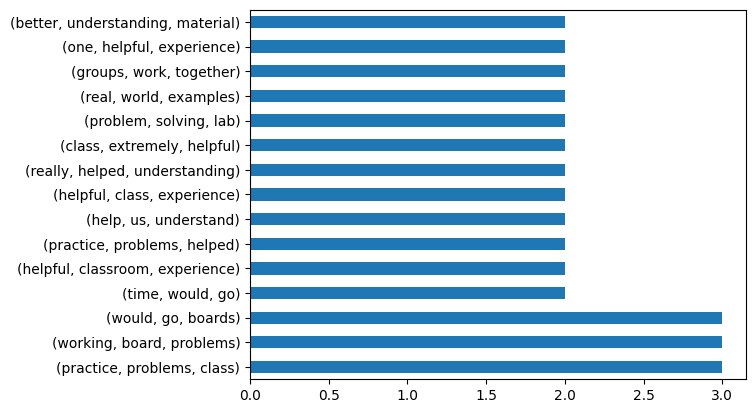

In [52]:
# Start by combining all responses into a single response
allResponses = helpfulNewStop.str.cat(sep = ' ') # Here we  combine all of the responses to do some analysis.
# allResponses = helpfulNew.str.cat(sep = ' ') # alternatively -- try using your responses *with* stopwords
allResponseTokens = nltk.word_tokenize(allResponses)
top15 = pd.Series(nltk.ngrams(allResponseTokens,3)).value_counts()[:15]
top15.plot.barh()

In [33]:
print(allResponses)

### **So what do we mean when we say Bag of Words?**

Extracting the occurrence of words within a document. It is a "bag" since we disregard the structure of a given sentence or how words interact with each other.  A model only cares about what words are used \- not the order in which they are used.   

Now, we analyze our corpus by creating *vector representations* of each document. These vector representations will allow us to work with documents as numerical data, compare them to one another, and hopefully design a useful information retrieval system.  

The first vector representation we will examine is **bag-of-words** (BoW). Here, in BoW, the dimension of each vector should represents the number of times a particular word occurs in a document.

**Word Mapping**

To start, we need to create a **vocabulary** that maps words to the indices of a vector. The `create_vocab()` function takes as input our `corpus` of strings and returns a dictionary that maps each unique word in the corpus to a unique integer *index*. The returned dictionary should satisfy the following properties:
- Each word is mapped to a number between $0$ and $V - 1$, inclusive, where $V$ is the number of unique words in the corpus.
- Words with higher frequency across the corpus should have smaller indices; i.e. the most frequent word should have index $0$ and the least frequent word should have index $V - 1$.  Ties are broken arbitrarily.

In [34]:
# use tokenized `corpus` and create an indexed vocabulary of every word in the corpus
# map words to indices of a vector to create a lookup table

from collections import Counter
from typing import Dict, List
from pandas import Series

def create_vocab(corpus: Series) -> Dict[str, int]:

    # concatenate all responses to get a list of every token used in the corpus
    all_words = corpus.str.cat(sep = ' ')
    token_list = nltk.word_tokenize(all_words)

    # use Counter to create dict of counts of all tokens
    token_dict = Counter(token_list)

    # make dict of {sorted **token_dict.most_common()** tokens : index}
    index_dict = dict([(x[0],y) for (x,y) in zip(token_dict.most_common(),range(len(token_dict)))])

    return index_dict


In [35]:
# sanity check cell
full_vocab = create_vocab(helpfulNew)
print("full vocab size:", len(full_vocab))
print("'the' index:", full_vocab['the'])
print("'board' index:", full_vocab['board'])
print("'problems' index:", full_vocab['problems'])
print("'are' index:", full_vocab['are'])
print("'fun' index:", full_vocab['fun'])

full vocab size: 1954
'the' index: 0
'board' index: 17
'problems' index: 11
'are' index: 141
'fun' index: 265


**BoW Representations**

Now, let's create the actual BoW representations. The function `create_bow()` does the following:
- accepts two inputs: `tokenized_corpus` and the output from `create_vocab()`
- it creates BoW representations for each comment and returns it
- specifically, the output needs to be a dictionary mapping each document id to a NumPy array $\vec x \in \mathbb{R}^V$, where $x_i$ is the number of times the word, whose index into the vocabulary is $i$, appears in the document. For example, if $i=0$ corresponds to "the", and "the" appears 17 times in the given document, then the 1st index of vector $\vec x$ should be 17.

In [36]:
tokenized_comments_helpful = helpfulNew.apply(lambda x: nltk.word_tokenize(x))
tokenized_comments_helpful

0       [in, class, examples, were, grate, for, xxx, x...
1       [i, particularly, thought, getting, up, to, th...
2       [every, time, we, would, go, to, boards, we, w...
3                       [humor, that, motivate, learning]
4       [during, almost, every, class, period, we, got...
                              ...                        
1693    [the, way, xxx, xxx, conducts, his, classroom,...
1694    [the, practice, problems, we, did, on, boards,...
1695    [every, class, xxx, xxx, helped, each, of, the...
1696    [every, day, was, a, helpful, classroom, exper...
1697                                [working, in, groups]
Name: text, Length: 1698, dtype: object

In [37]:
# create BoW representations based on counts of words in each comment
import numpy as np

def create_bow(tokenized_corpus: Series, vocab: Dict[str, int]) -> Dict[int, np.ndarray]:

    # empty dictionary to add {doc_id: bow_array} key,value pairs
    doc_map = {}

    # iterate through each comment by doc_id
    for doc_id, tokens in tokenized_corpus.to_dict().items():
        bow_array = np.zeros(len(vocab))#,dtype=int)
        token_count = Counter(tokens)

        # go through each word and match its count with the word's appropriate index
        #    based on the `vocab` dictionary
        for word,count in token_count.items():
            # print(doc_id)
            idx = vocab[word]
            bow_array[idx] = count

        # add the resultant {doc_id: bow_array} key,value pair to the returned dictionary
        doc_map[doc_id] = bow_array

    return doc_map

In [38]:
# sanity check
full_bow = create_bow(tokenized_comments_helpful, full_vocab)
print("# keys:", len(full_bow.keys()))
print("vocab size:", len(full_bow[5]))
print(full_bow[5][:20])
print(full_bow[10][:20])

# keys: 1698
vocab size: 1954
[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Using BoW**

Great! Now that we have vector representations of all of our _documents / comments_ , let's see what we can do with them. To quantify the distance between two documents, we will calculate the **cosine similarity** between their vector representations. We can find $k$ comments in the rest of the corpus that have the largest cosine similarity with a particular comment. Let's try to answer the following questions
1. What is the cosine similarity between the following pairs of comments: 42 and 84?
2. What are $k = 5$ comments that are most similar to one another? Do these results seem reasonable?
3. Explore the corpus a bit.  Are there comments that are close to many different documents? Are there documents that are far from all other documents? 
4. Can you find a comment whose $k = 5$ closest recommendations don't make sense?  Why do you think that's the case?

In [39]:
# use BoW with cosine similarity
def cos_sim(doc1,doc2,doc_dict):
    # get associated bow vectors of input docs
    a = doc_dict[doc1]
    b = doc_dict[doc2]

    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

print(f'cosine similarity of comments 42 and 84: {cos_sim(42,84,full_bow)}')
print(f' * comment 42: {helpfulNew.loc[42]}')
print(f' * comment 84: {helpfulNew.loc[84]}')
print('\n')
print(f'cosine similarity of comments 80 and 204: {cos_sim(80,204,full_bow)}')
print(f' * comment 80: {helpfulNew.loc[80]}')
print(f' * comment 204: {helpfulNew.loc[204]}')

cosine similarity of comments 42 and 84: 0.19069251784911848
 * comment 42: the instructor really helped us through the project
 * comment 84: taking boards is always the best way to learn i believe


cosine similarity of comments 80 and 204: 0.19399589841579265
 * comment 80: xxx xxx made us do a lot of board work every day to practice problems which helped me a lot she would then come by each students board and help correct them if needed
 * comment 204: doing real world problems associated with each lesson it really helped my understanding of how to actually apply the concepts we learned instead of just memorizing steps and functions


In [40]:
# Create a contrived string to show that higher cosine similarity is possible
# similar to comment 84
contrived_comment = 'i think taking boards is the best way to learn in class'
contrived_tokenized = pd.Series(contrived_comment).apply(lambda x: nltk.word_tokenize(x))
contrived_bow = create_bow(contrived_tokenized, full_vocab)


# temporarily add contrived comment to `full_bow` dictionary
full_bow['temp'] = contrived_bow[0]

print(f'cosine similarity of comments 84 and contrived example: {cos_sim(84,"temp",full_bow)}\n')
print(f' * comment 84: \t\t{helpfulNew.loc[84]}')
print(f' * contrived comment: \t{contrived_comment}')

# remove contrived comment to `full_bow` dictionary
del full_bow['temp']

cosine similarity of comments 84 and contrived example: 0.7833494518006403

 * comment 84: 		taking boards is always the best way to learn i believe
 * contrived comment: 	i think taking boards is the best way to learn in class


In [41]:
def doc_sim(doc1, doc_dict, k=5):

    cos_sim_dict = {}
    for doc2 in doc_dict.keys():
        if doc2 == doc1: 
            pass
        else:
            cos_sim_dict[doc2]=cos_sim(doc1,doc2,doc_dict)

    # I used the following stackoverflow page to sort by dict value
    #    https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

    #  {doc_id: cos_sim to given doc}; sort by value REVERSE
    sorted_dict = {k: v for k, v in sorted(cos_sim_dict.items(), key=lambda item: item[1],reverse=True)}

    # resulting docids with closest cosine similarity
    sorted_docids = [x for x,y in zip(sorted_dict.keys(),range(k))]


    return sorted_docids #titles #, sorted_docids

# use function and print titles
comment_entry = 51
k=5
bowsim = doc_sim(comment_entry,full_bow,k)
print(f'Original comment: {helpfulNew.loc[comment_entry]}')
print(f'\n{k} most similar comments:')
for d in bowsim:
    print(f' *  {helpfulNew.loc[d]}')

Original comment: the path project i learned a lot about modeling and real world solutions

5 most similar comments:
 *  i enjoyed the project because we got to choose our group project and it helped me learn a lot about statistics
 *  xxx xxx provided good feedback on the course project and i appreciated doing a lot of work leading up to the project it felt like i got a lot of value added from the proposalstudy methods etc
 *  the fact that the word problems were very often focused around real world situations and sometimes military situations made them much more applicable to what i will be facing in the real world and it showed me that path actually is very useful and applicable in the real world
 *  although the project was confusing at times and very time consuming i liked doing a problem that could be applied in the real world
 *  the path projects were by far the best part because i could take the concepts in class a relatively apply them to a real world problem and go very in d

In [42]:
import time

def avg_doc_sim(bow_dict):
    '''
    Input:   BOW dictionary of doc_id: np.array of BOW vector
    Output:  a dictionary of doc_id:average cosine similarity across documents
    '''
    avg_doc_sim_dict = {}
    num_docs = len(bow_dict.keys())

    for doc1 in bow_dict.keys():
        # reset accumulator of document similarities
        docsim = 0
        for doc2 in bow_dict.keys():
            if doc2 == doc1:
                pass
            else:
                # accumulate total document similarity values
                docsim+=cos_sim(doc1,doc2,bow_dict)

        avg_doc_sim_dict[doc1] = docsim/(num_docs-1)

    return avg_doc_sim_dict

t0 = time.time()
avg_doc_sim_full = avg_doc_sim(full_bow)
print(f'total time = {time.time()-t0}')

total time = 50.84252619743347


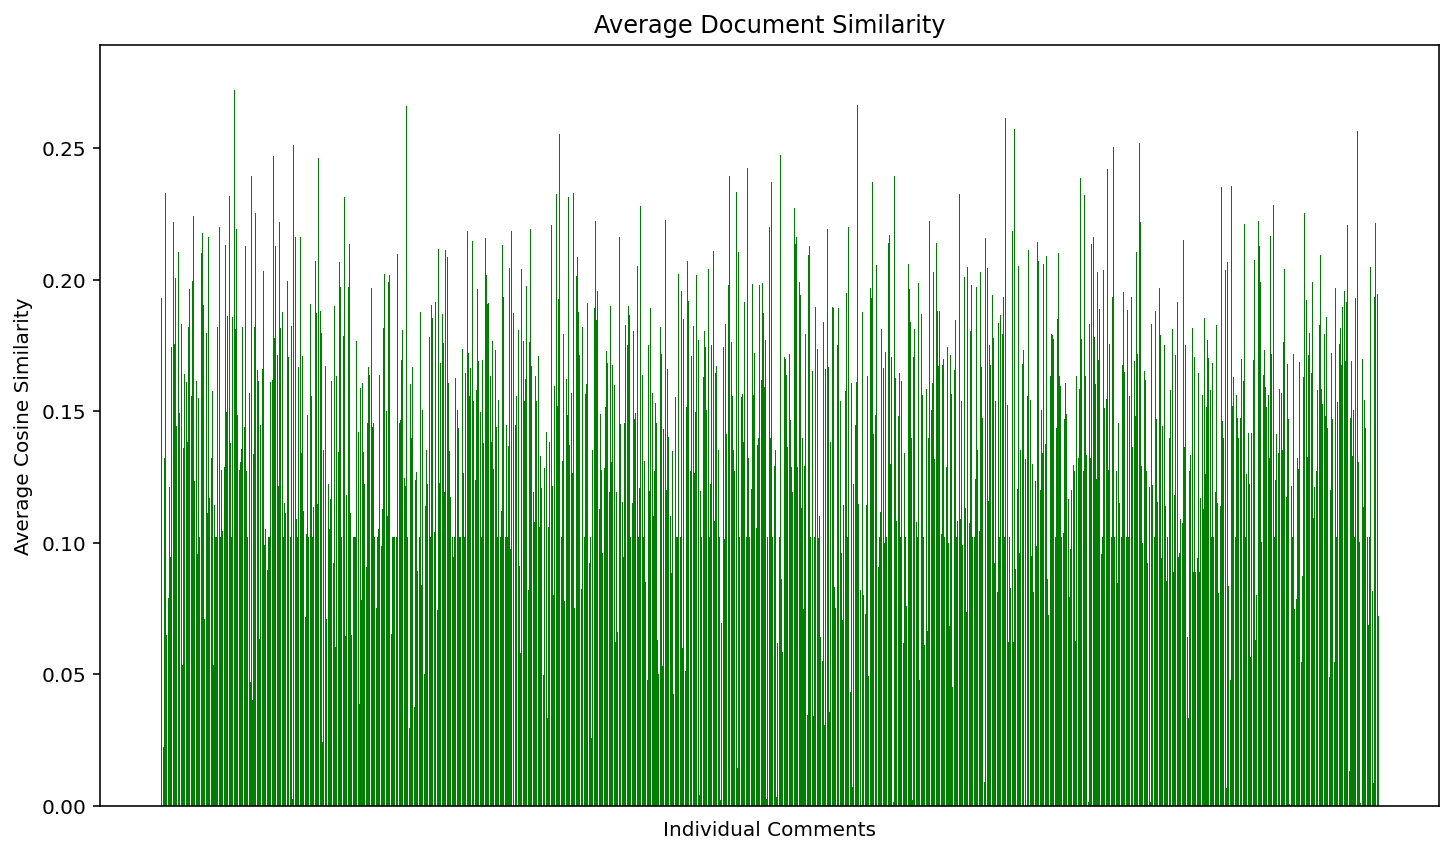

In [43]:
import matplotlib.pyplot as plt

x=range(len(full_bow))
x_labels = [x for x in avg_doc_sim_full.keys()]
y = [x for x in avg_doc_sim_full.values()]

plt.bar(x, y, color='green', align='center')
plt.title('Average Document Similarity')
plt.xticks([])
plt.ylabel('Average Cosine Similarity')
plt.xlabel('Individual Comments')
plt.show()

In [44]:
sort_y = sorted(y)

loc_min_y = list(avg_doc_sim_full.keys())[list(avg_doc_sim_full.values()).index(min(y))]
print(f'Comment with min cos sim:  {loc_min_y} with {min(y):.3f}')

loc_max_y = list(avg_doc_sim_full.keys())[list(avg_doc_sim_full.values()).index(max(y))]
print(f'Comment with max cos sim:  {loc_max_y} with {max(y):.3f}')

print(f'Average cos sim across all Comments:  {np.mean(y):.3f}')

print('\nmin cos_sim comment:')
print('  * '+helpfulNew.iloc[492])
print('\nmax cos_sim comment:')
print('  * '+helpfulNew.iloc[342])

print('\nLowest 10 cos_sim values:\tHighest 10 cos_sim values:')
for i,j in zip(sort_y[:10],sort_y[-10:]):
      print(f'{i:.3f}\t\t\t\t{j:.3f}')

Comment with min cos sim:  40 with 0.000
Comment with max cos sim:  1656 with 0.276
Average cos sim across all Comments:  0.144

min cos_sim comment:
  * reflections

max cos_sim comment:
  * the group work and the problems that we did on the board in class were especially helpful to me in firing out what i was doing right and what i was doing wrong being forced to do corrections on my xxx both inspired me to do better and to learn from my mistakes

Lowest 10 cos_sim values:	Highest 10 cos_sim values:
0.000				0.257
0.000				0.257
0.000				0.258
0.000				0.260
0.000				0.262
0.000				0.266
0.001				0.266
0.001				0.271
0.001				0.272
0.001				0.276


#### **Run BoW again without stopwords**

In [45]:
# create new vocab -- reduced to 1835 from 1953
nostop_vocab = create_vocab(helpfulNewStop)
print("full vocab size:", len(nostop_vocab))
print("'board' index:", nostop_vocab['board'])
print("'problems' index:", nostop_vocab['problems'])
print("'fun' index:", nostop_vocab['fun'])

# tokenize comments without stopwords
tokenized_comments_helpful_nostop = helpfulNewStop.apply(lambda x: nltk.word_tokenize(x))

# create BoW representations based on counts of words in each comment
nostop_bow = create_bow(tokenized_comments_helpful_nostop, nostop_vocab)
print("# keys:", len(nostop_bow.keys()))
print("vocab size:", len(nostop_bow[5]))
print(nostop_bow[5][:20])
print(nostop_bow[10][:20])

full vocab size: 1836
'board' index: 4
'problems' index: 1
'fun' index: 184


# keys: 1698
vocab size: 1836
[0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [46]:
# compare cosine similarity without stopwords
print(f'cosine similarity of comments 42 and 84: {cos_sim(42,84,nostop_bow)}')
print(f' * comment 42: {helpfulNewStop.loc[42]}')
print(f' * comment 84: {helpfulNewStop.loc[84]}')
print('\n')
print(f'cosine similarity of comments 80 and 204: {cos_sim(80,204,nostop_bow)}')
print(f' * comment 80: {helpfulNewStop.loc[80]}')
print(f' * comment 204: {helpfulNewStop.loc[204]}')

cosine similarity of comments 42 and 84: 0.0
 * comment 42: instructor really helped us project
 * comment 84: taking boards always best way learn believe


cosine similarity of comments 80 and 204: 0.10660035817780521
 * comment 80: made us lot board work every day practice problems helped lot would come students board help correct needed
 * comment 204: real world problems associated lesson really helped understanding actually apply concepts learned instead memorizing steps functions


In [47]:
# use doc_sim function and print comments withoutstopwords
comment_entry = 51
k=5
bowsim = doc_sim(comment_entry,nostop_bow,k)
print(f'Original comment: {helpfulNew.loc[comment_entry]}')
print(f'\n{k} most similar comments:')
for d in bowsim:
    print(f' *  {cos_sim(comment_entry,d,nostop_bow):.3f} {helpfulNew.loc[d]}')

Original comment: the path project i learned a lot about modeling and real world solutions

5 most similar comments:
 *  0.500 doing the path project
 *  0.433 trying to show real world application of path
 *  0.387 the fact that the word problems were very often focused around real world situations and sometimes military situations made them much more applicable to what i will be facing in the real world and it showed me that path actually is very useful and applicable in the real world
 *  0.354 xxx project
 *  0.283 the final path modeling day in this class used a lot of our skill in an advanced way but i still had a firm grasp on the material


/tmp/ipykernel_3742/1881393118.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))


### **Text Summarization**

[https://www.analyticsvidhya.com/blog/2018/02/natural\-language\-processing\-for\-beginners\-using\-textblob/?utm\_source=blog&utm\_medium=how\-to\-remove\-stopwords\-text\-normalization\-nltk\-spacy\-gensim\-python](https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/?utm_source=blog&utm_medium=how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python) 



In [48]:
import random
nouns = list()
blob = TextBlob(allResponses)
for word, tag in blob.tags:
    if tag == 'NN':
        nouns.append(word.lemmatize())

print("Students think that helpful classroom experiences include:")
for item in random.sample(nouns,10):
    print(item)

Students think that helpful classroom experiences include:
work
problem
xxxi
jump
instructor
example
board
limit
experience
smelter


### **Text Translation**

[https://www.analyticsvidhya.com/blog/2018/02/natural\-language\-processing\-for\-beginners\-using\-textblob/?utm\_source=blog&utm\_medium=how\-to\-remove\-stopwords\-text\-normalization\-nltk\-spacy\-gensim\-python](https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/?utm_source=blog&utm_medium=how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python) 

List of Languages: [https://meta.wikimedia.org/wiki/Template:List\_of\_language\_names\_ordered\_by\_code](https://meta.wikimedia.org/wiki/Template:List_of_language_names_ordered_by_code)   



In [49]:
from textblob import TextBlob
spanishText = "Creo que el procesamiento del lenguaje natural es una buena manera de entender el texto no estructurado."
blob = TextBlob(spanishText)
print(blob.translate(from_lang='es', to='en'))

I think that natural language processing is a good way to understand the unstructured text.


### **Text Classification**

[https://www.analyticsvidhya.com/blog/2018/02/natural\-language\-processing\-for\-beginners\-using\-textblob/?utm\_source=blog&utm\_medium=how\-to\-remove\-stopwords\-text\-normalization\-nltk\-spacy\-gensim\-python](https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/?utm_source=blog&utm_medium=how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python) 

Data "cadet borrowed" from [https://archive.ics.uci.edu/ml/machine\-learning\-databases/00331/](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/)   


Other Classifiers include: MaxEntClassifier, .NLTKClassifier,.PositiveNaiveBayesClassifier


In [50]:
training = [
('I really recommend this faceplates since it looks very nice, elegant and cool.','pos'),
('It feels more comfortable than most headsets because I wear glasses and that gets in the way sometimes.','pos'),
('Mic Does not work.','neg'),
('Great for iPODs too.','pos'),
('Even in my BMW 3 series which is fairly quiet, I have trouble hearing what the other person is saying.','neg'),
('Do Not Buy for D807...wrongly advertised for D807.','neg'),
('Great choice!','pos'),
]
testing = [
('Well packaged, arrived on time, and works as intended.','pos'),
('Not a good bargain.','neg'),
('The headsets are easy to use and everyone loves them.','pos')
]

In [51]:
from textblob import classifiers, TextBlob #Workhorse of lexical analysis
classifier = classifiers.NaiveBayesClassifier(training)
## decision tree classifier
dt_classifier = classifiers.DecisionTreeClassifier(training)
print (classifier.accuracy(testing))
classifier.show_informative_features(5)

0.6666666666666666
Most Informative Features
         contains(Great) = False             neg : pos    =      1.8 : 1.0
           contains(and) = False             neg : pos    =      1.8 : 1.0
             contains(3) = False             pos : neg    =      1.4 : 1.0
           contains(BMW) = False             pos : neg    =      1.4 : 1.0
           contains(Buy) = False             pos : neg    =      1.4 : 1.0


In [52]:
sentence = TextBlob("This headset is the worst that I've ever bought", classifier = classifier)
print(sentence.classify())

pos


### **Vector Representation of Words**

what is TFIDF?  



### Test of Huggingface



In [53]:
from transformers import pipeline
# generator = pipeline("text-generation")
# generator("In this course, we will teach you how to")

In [55]:
classifier = pipeline(task="zero-shot-classification",model='distilbert-base-uncased')
classifier(
    "This is a course about the Transformers library. I can't stand it! This sux!",
    candidate_labels=["positive", "negative", "neutral"],
)

RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
No module named 'keras.saving.hdf5_format'

In [57]:
zepplin = "There's a lady who's sure, All that glitters is gold And she's buying a stairway to heaven When she gets there she knows If the stores are all closed With a word she can get what she came for Ooh ooh ooh ooh ooh And she's buying a stairway to heaven There's a sign on the wall But she wants to be sure 'Cause you know, sometimes words have two meanings In a tree by the brook There's a songbird who sings Sometimes all of our thoughts are misgiven Ooh, it makes me wonder Ooh, it makes me wonder There's a feeling I get When I look to the west And my spirit is crying for leaving In my thoughts I have seen Rings of smoke through the trees And the voices of those who stand looking Ooh, it makes me wonder Ooh, it really makes me wonder And it's whispered that soon If we all call the tune Then the piper will lead us to reason And a new day will dawn For those who stand long And the forests will echo with  laughter Oh whoa-whoa-whoa, oh-oh If there's a bustle in your hedgerow, don't be alarmed now It's just a spring clean for the May Queen Yes, there are two paths you can go by, but in the long run And there's still time to change the road you're on And it makes me wonder Oh, whoa Your head is humming and it won't go In case you don't know The piper's calling you to join him Dear lady, can you hear the wind blow? And did you know Your stairway lies on the whispering wind? And as we wind on down the road Our shadows taller than our soul There walks a lady we all know Who shines white light and wants to show How everything still turns to gold And if you listen very hard The tune will come to you at last When all are one and one is all, yeah To be a rock and not to roll And she's buying a stairway to heaven"

(-0.5, 399.5, 199.5, -0.5)

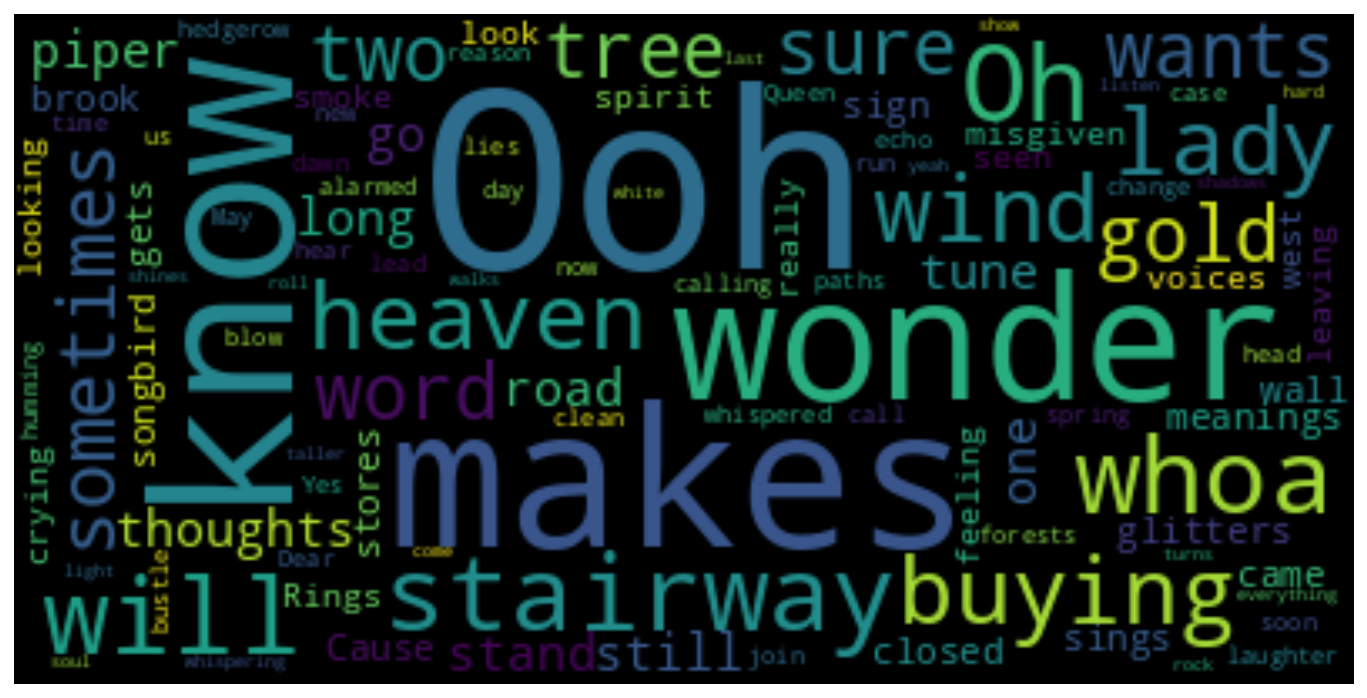

In [58]:
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(zepplin)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

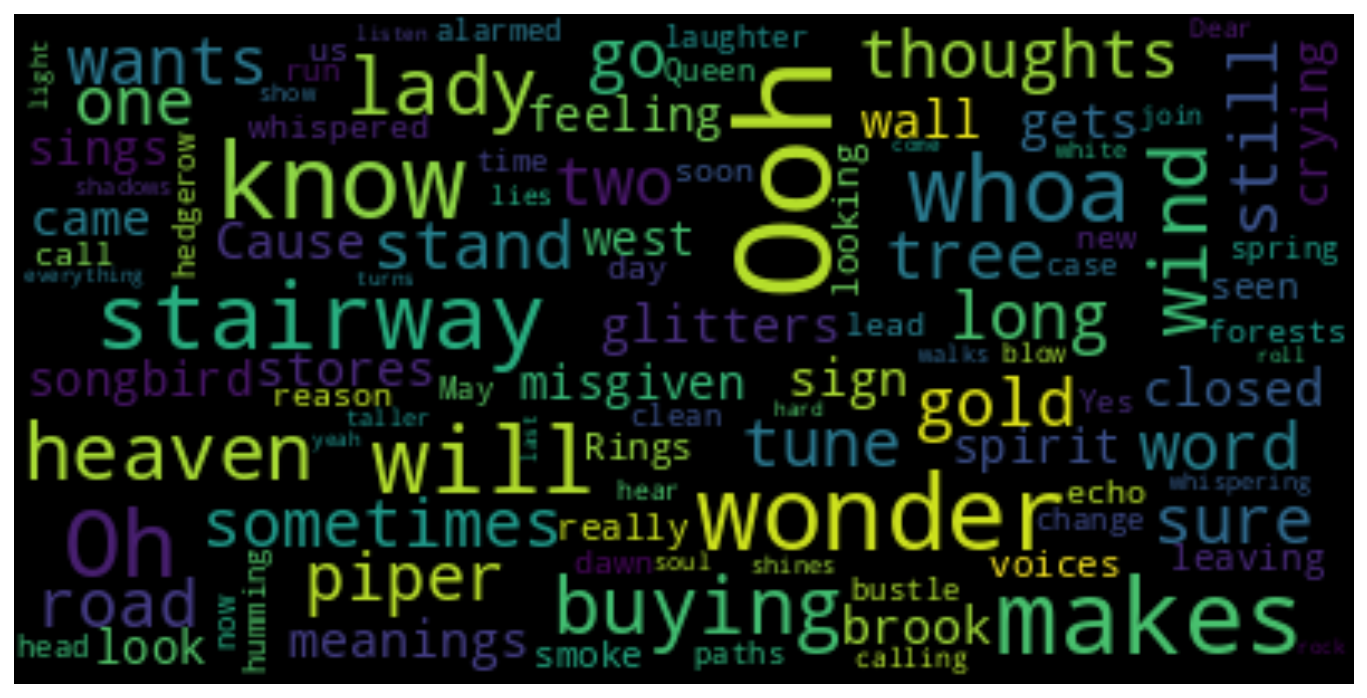

In [59]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(zepplin)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

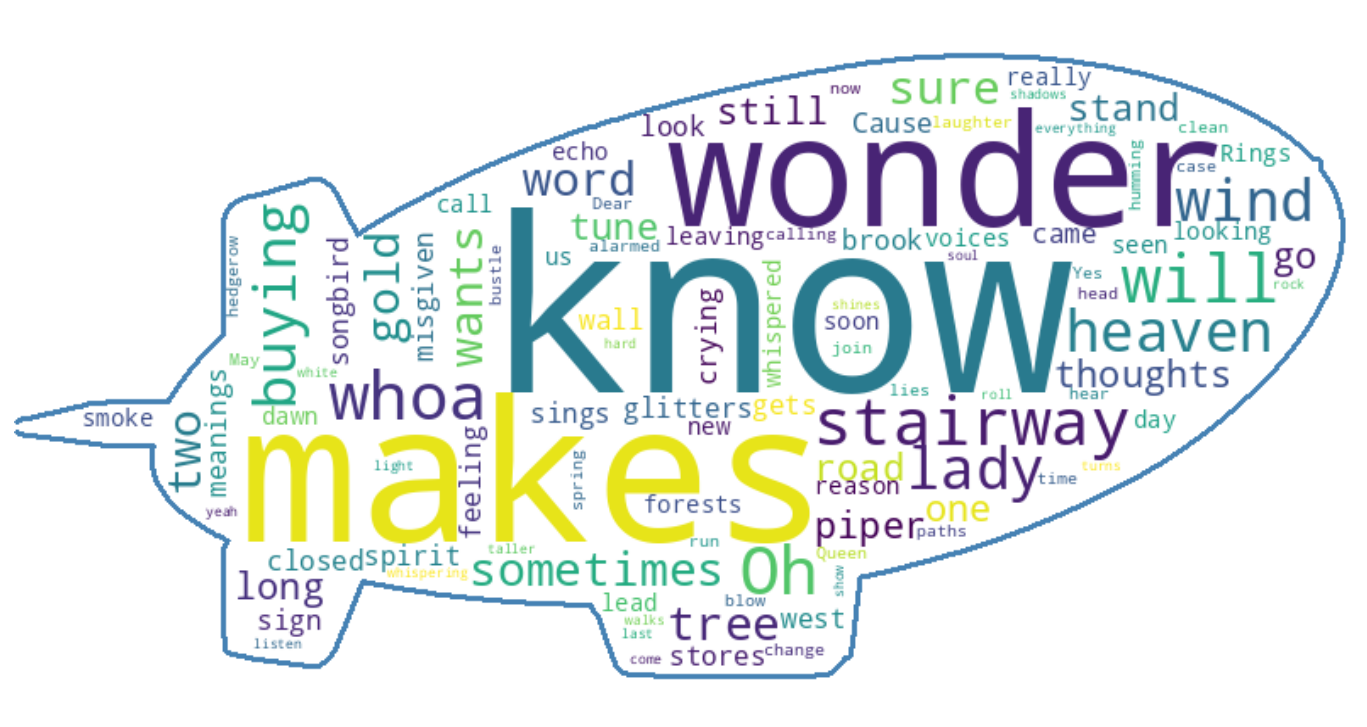

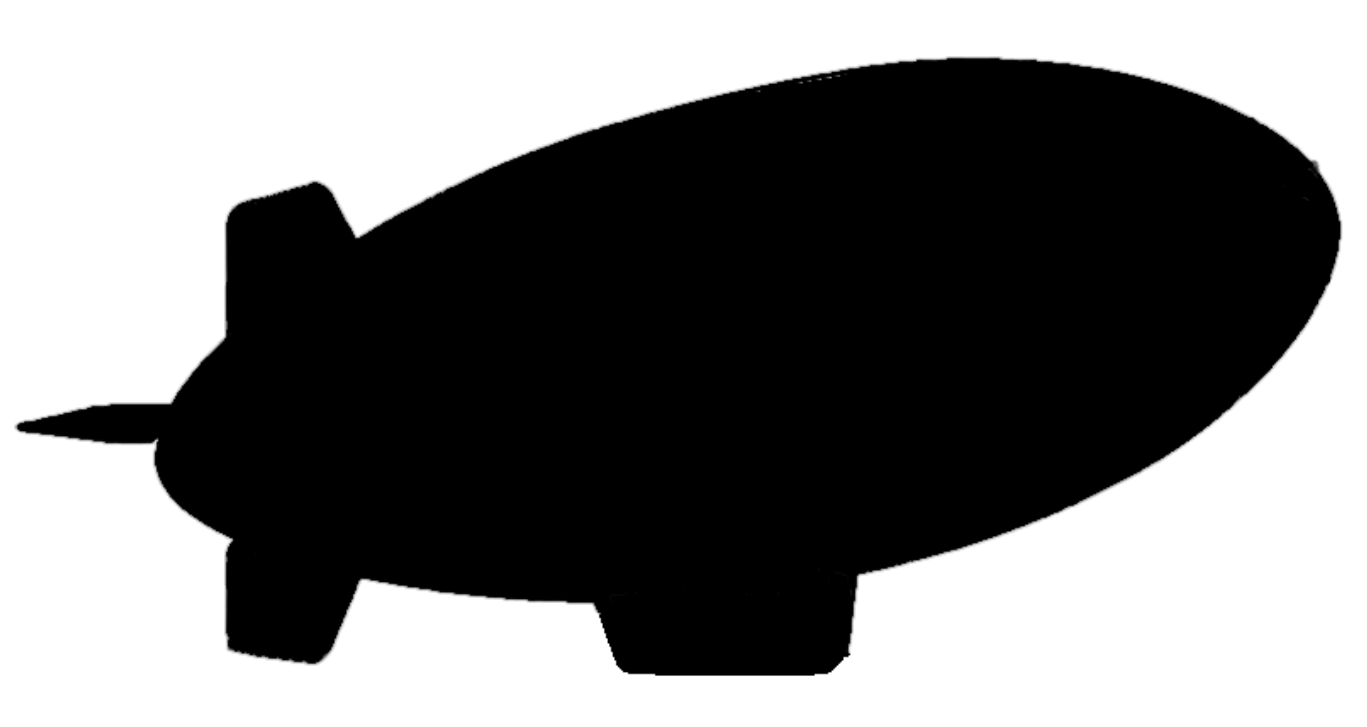

In [60]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
from wordcloud import WordCloud, STOPWORDS
zep_Mask = np.array(Image.open(path.join(d, "zepMask.png")))
stopwords = set(STOPWORDS)
stopwords.add("Ooh")

wc = WordCloud(background_color="white", max_words=2000, mask=zep_Mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

wc.generate(zepplin)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(zep_Mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [61]:
print(wc.words_)

{'know': 1.0, 'makes': 1.0, 'wonder': 1.0, 'stairway': 0.8, 'will': 0.8, 'Oh': 0.8, 'whoa': 0.8, 'lady': 0.6, 'buying': 0.6, 'heaven': 0.6, 'wind': 0.6, 'sure': 0.4, 'gold': 0.4, 'word': 0.4, 'wants': 0.4, 'sometimes': 0.4, 'two': 0.4, 'tree': 0.4, 'thoughts': 0.4, 'stand': 0.4, 'tune': 0.4, 'piper': 0.4, 'long': 0.4, 'go': 0.4, 'still': 0.4, 'road': 0.4, 'one': 0.4, 'glitters': 0.2, 'gets': 0.2, 'stores': 0.2, 'closed': 0.2, 'came': 0.2, 'sign': 0.2, 'wall': 0.2, 'Cause': 0.2, 'meanings': 0.2, 'brook': 0.2, 'songbird': 0.2, 'sings': 0.2, 'misgiven': 0.2, 'feeling': 0.2, 'look': 0.2, 'west': 0.2, 'spirit': 0.2, 'crying': 0.2, 'leaving': 0.2, 'seen': 0.2, 'Rings': 0.2, 'smoke': 0.2, 'voices': 0.2, 'looking': 0.2, 'really': 0.2, 'whispered': 0.2, 'soon': 0.2, 'call': 0.2, 'lead': 0.2, 'us': 0.2, 'reason': 0.2, 'new': 0.2, 'day': 0.2, 'dawn': 0.2, 'forests': 0.2, 'echo': 0.2, 'laughter': 0.2, 'bustle': 0.2, 'hedgerow': 0.2, 'alarmed': 0.2, 'now': 0.2, 'spring': 0.2, 'clean': 0.2, 'May': 0